In [4]:
from glob import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
RESULTS = glob(os.path.join("set_rank_results_conv_cifar10", "*.json"))
results = pd.DataFrame([json.load(open(file)) for file in RESULTS])
results["best_val_categorical_accuracy"] = results["val_categorical_accuracy"].map(np.max)
results.head()

,initial_rank,new_rank,rank_update_epoch,total_epochs,loss,categorical_accuracy,val_loss,val_categorical_accuracy,pre_update_loss,pre_update_categorical_accuracy,pre_update_val_loss,pre_update_val_categorical_accuracy,post_update_loss,post_update_categorical_accuracy,post_update_val_loss,post_update_val_categorical_accuracy,best_val_categorical_accuracy
0,-1,160,3,50,"[1.7554229497909546, 1.4456746578216553, 1.312...","[0.35468000173568726, 0.47137999534606934, 0.5...","[1.5234348773956299, 1.367756962776184, 1.2588...","[0.4422999918460846, 0.49570000171661377, 0.54...",1.251135,0.54498,1.258807,0.5404,1.251135,0.54498,1.258807,0.5404,0.7720
1,-1,160,3,50,"[1.748547911643982, 1.442836880683899, 1.31502...","[0.3552999794483185, 0.47401997447013855, 0.52...","[1.5217300653457642, 1.3854939937591553, 1.254...","[0.4404999911785126, 0.4948999881744385, 0.542...",1.247572,0.54868,1.254613,0.5421,1.247572,0.54868,1.254613,0.5421,0.7714
2,-1,10,1,50,"[1.7500041723251343, 1.4324498176574707, 1.299...","[0.3546600043773651, 0.4763999879360199, 0.529...","[1.5113860368728638, 1.3492108583450317, 1.267...","[0.4502999782562256, 0.513700008392334, 0.5449...",1.516364,0.44416,1.511385,0.4503,1.516364,0.44416,1.511385,0.4503,0.7703
3,-1,10,2,50,"[1.7486727237701416, 1.4378107786178589, 1.307...","[0.35575997829437256, 0.4782799780368805, 0.52...","[1.5040370225906372, 1.3564341068267822, 1.306...","[0.4542999863624573, 0.5054000020027161, 0.531...",1.356356,0.50780,1.356434,0.5054,1.356356,0.50780,1.356434,0.5054,0.7722
4,-1,10,1,50,"[1.7473396062850952, 1.4331538677215576, 1.299...","[0.3592199981212616, 0.4734799861907959, 0.529...","[1.5055315494537354, 1.3362433910369873, 1.243...","[0.45080000162124634, 0.5145999789237976, 0.55...",1.509251,0.44822,1.505532,0.4508,1.509251,0.44822,1.505532,0.4508,0.7695


In [7]:
results["new_rank"].unique(), results["rank_update_epoch"].unique()

(array([160,  10,   1,  50]), array([3, 1, 2]))

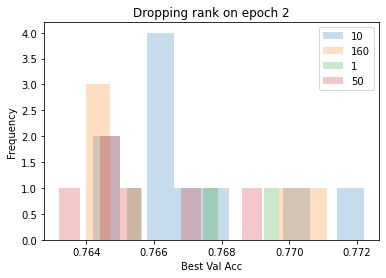

,new_rank,best_val_categorical_accuracy
new_rank,,
1,1.0,0.767567
10,10.0,0.767220
50,50.0,0.765667
160,160.0,0.766720


In [31]:
update_epoch = 2
epoch_results = results.loc[
    results["rank_update_epoch"] == update_epoch,
    ["new_rank", "best_val_categorical_accuracy"]
]
for new_rank in epoch_results["new_rank"].unique():
    plt.hist(
        epoch_results.loc[epoch_results["new_rank"] == new_rank, ["best_val_categorical_accuracy"]],
        label=f"{new_rank}",
        # bins=10,
        alpha=0.25)
plt.title(f"Dropping rank on epoch {update_epoch}")
plt.xlabel("Best Val Acc")
plt.ylabel("Frequency")
plt.legend()
plt.show()
epoch_results.groupby("new_rank").apply(np.mean)